# **1. Exploratory Data Analysis**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
df0 = pd.read_csv('DATASETS/hearing_test.csv')
df = df0.copy()
df.head()

,age,physical_score,test_result
0,33.000,40.700,1
1,50.000,37.200,1
2,52.000,24.700,0
3,56.000,31.000,0
4,35.000,42.900,1


In [3]:
df.tail()

,age,physical_score,test_result
4995,73.000,3.900,0
4996,57.000,33.900,1
4997,49.000,34.500,1
4998,38.000,46.400,1
4999,48.000,38.500,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             5000 non-null   float64
 1   physical_score  5000 non-null   float64
 2   test_result     5000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 117.3 KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,5000.000,51.609,11.287,18.000,43.000,51.000,60.000,90.000
physical_score,5000.000,32.760,8.170,-0.000,26.700,35.300,38.900,50.000
test_result,5000.000,0.600,0.490,0.000,0.000,1.000,1.000,1.000


In [6]:
df["test_result"].value_counts()

test_result
1    3000
0    2000
Name: count, dtype: int64

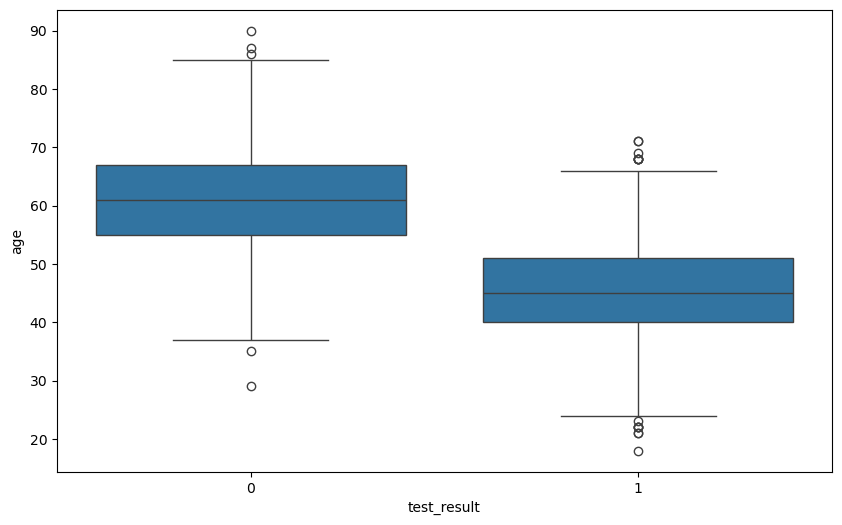

In [7]:
sns.boxplot(x= "test_result", y= "age", data=df);

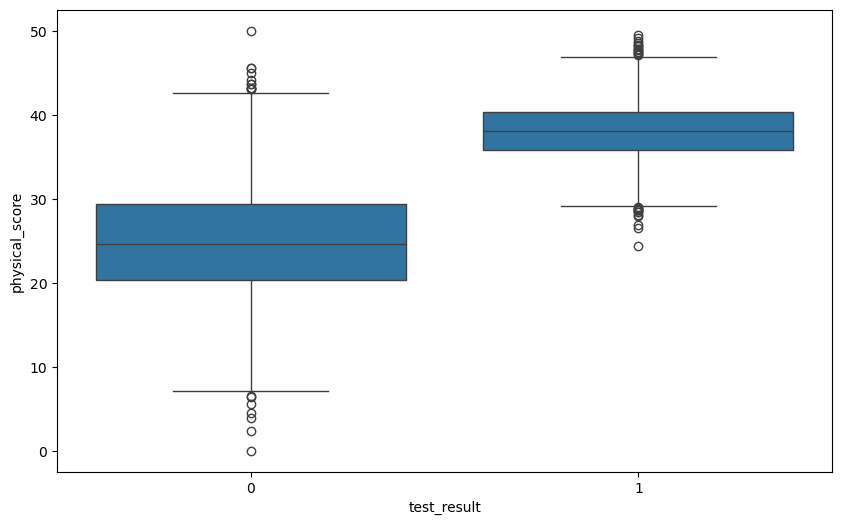

In [8]:
sns.boxplot(x= "test_result", y= "physical_score", data=df);

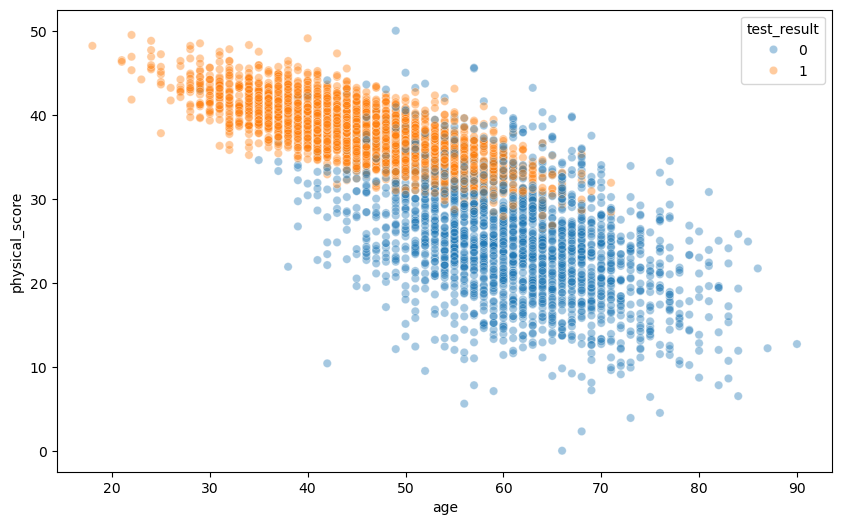

In [9]:
sns.scatterplot(x="age", y="physical_score", data=df, hue="test_result", alpha= 0.4);

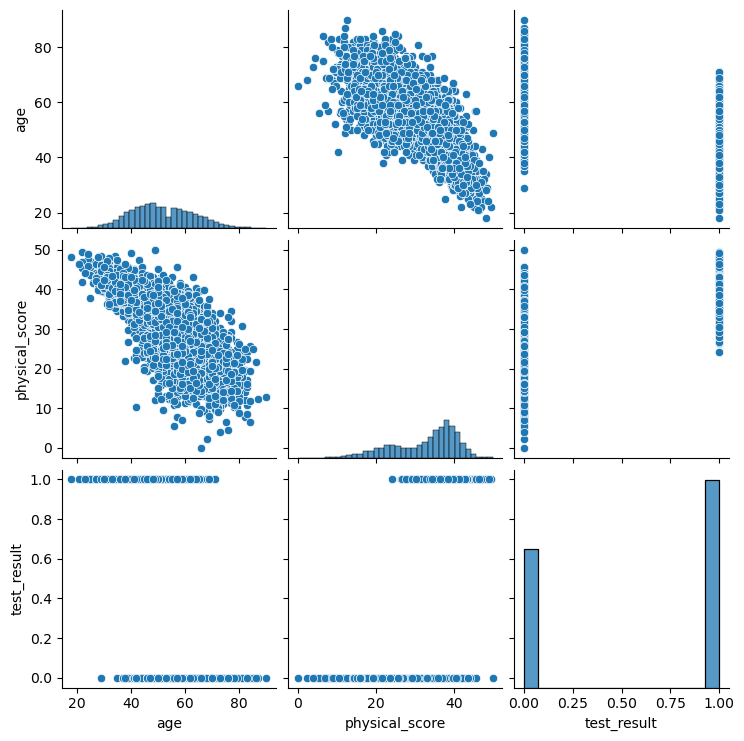

In [10]:
sns.pairplot(df);

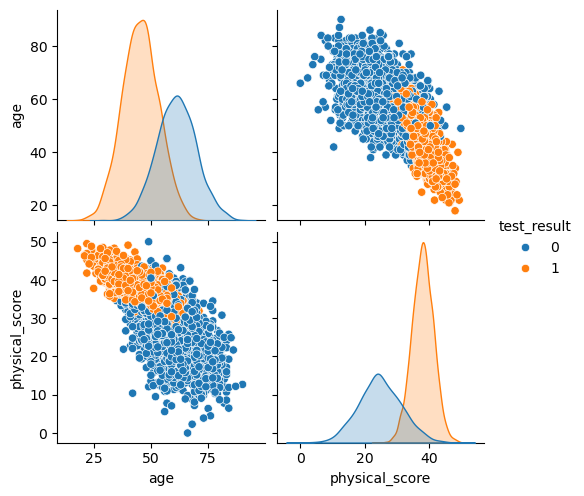

In [11]:
sns.pairplot(df, hue = "test_result");

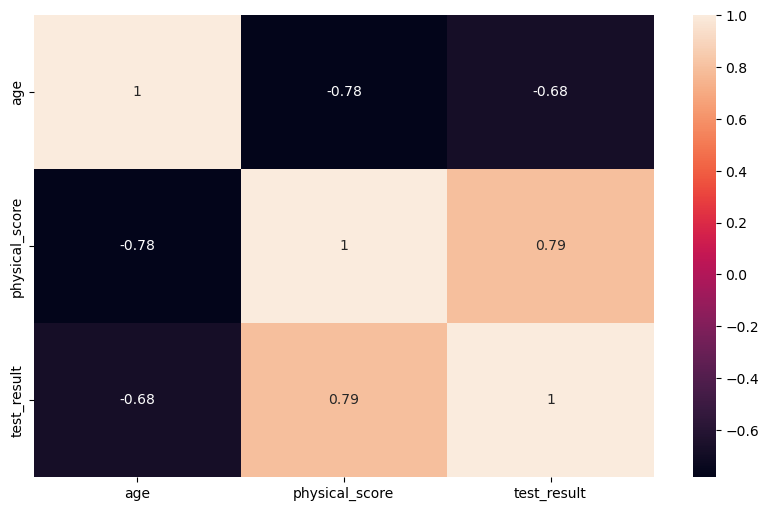

In [12]:
sns.heatmap(df.corr(), annot=True);

# **2. Modelling for Logistic Regression**

## 2.1. Train | Test Split

In [13]:
X = df.drop(columns=['test_result'])
y = df['test_result']

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

## 2.2. Modeling without Scaling Data

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

LogisticRegression()

In [18]:
log_model.coef_

array([[-0.0790601 ,  0.43759344]])

In [19]:
log_model.intercept_

array([-9.74301158])

## 2.2. Modeling with Scaling Data

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [21]:
operations = [('scaler', StandardScaler()), ('logistic', LogisticRegression())]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic', LogisticRegression())])

In [22]:
pipe_model['logistic'].coef_

array([[-0.9039212 ,  3.48681952]])

In [23]:
pipe_model['logistic'].intercept_

array([0.47855828])

> ***scale etmeden önceki coef'ler ve intercept:***
>
> 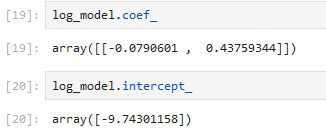

In [24]:
y_pred = pipe_model.predict(X_test)
y_pred

array([1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,

In [25]:
y_pred_proba = pipe_model.predict_proba(X_test)
y_pred_proba

array([[0.02436668, 0.97563332],
       [0.02672574, 0.97327426],
       [0.9893468 , 0.0106532 ],
       ...,
       [0.02396838, 0.97603162],
       [0.94905149, 0.05094851],
       [0.22356825, 0.77643175]])

In [26]:
y_pred_proba_rounded = np.round(y_pred_proba, 2)
y_pred_proba_rounded

array([[0.02, 0.98],
       [0.03, 0.97],
       [0.99, 0.01],
       ...,
       [0.02, 0.98],
       [0.95, 0.05],
       [0.22, 0.78]])

In [27]:
test_data = pd.concat([X_test, y_test], axis=1)
test_data

,age,physical_score,test_result
1718,39.000,37.800,1
2511,45.000,38.700,1
345,56.000,21.800,0
2521,40.000,44.000,1
54,64.000,25.400,0
...,...,...,...
3900,71.000,23.300,0
3753,51.000,32.600,1
3582,42.000,38.400,1
2392,52.000,24.800,0


In [28]:
test_data["pred_proba"] = y_pred_proba[:,1]
test_data

,age,physical_score,test_result,pred_proba
1718,39.000,37.800,1,0.976
2511,45.000,38.700,1,0.973
345,56.000,21.800,0,0.011
2521,40.000,44.000,1,0.998
54,64.000,25.400,0,0.026
...,...,...,...,...
3900,71.000,23.300,0,0.006
3753,51.000,32.600,1,0.622
3582,42.000,38.400,1,0.976
2392,52.000,24.800,0,0.051


In [29]:
test_data["pred"] = y_pred
test_data

,age,physical_score,test_result,pred_proba,pred
1718,39.000,37.800,1,0.976,1
2511,45.000,38.700,1,0.973,1
345,56.000,21.800,0,0.011,0
2521,40.000,44.000,1,0.998,1
54,64.000,25.400,0,0.026,0
...,...,...,...,...,...
3900,71.000,23.300,0,0.006,0
3753,51.000,32.600,1,0.622,1
3582,42.000,38.400,1,0.976,1
2392,52.000,24.800,0,0.051,0


In [30]:
test_data.sample(10)

,age,physical_score,test_result,pred_proba,pred
4767,43.000,36.700,1,0.948,1
1695,45.000,37.600,1,0.958,1
959,44.000,36.800,1,0.946,1
3835,77.000,12.100,0,0.000,0
755,76.000,28.500,0,0.037,0
378,40.000,39.300,1,0.986,1
4649,47.000,32.000,0,0.637,1
4258,42.000,37.200,1,0.961,1
3616,52.000,33.400,0,0.682,1
4928,86.000,21.700,0,0.001,0


In [31]:
test_data[((test_data["test_result"]==1) & (test_data["pred"]==0)) | ((test_data["test_result"]==0) & (test_data["pred"]==1)) ]

,age,physical_score,test_result,pred_proba,pred
2371,46.000,36.400,0,0.926,1
618,63.000,33.400,1,0.470,0
2145,65.000,35.200,0,0.621,1
3200,60.000,32.900,1,0.477,0
1726,46.000,36.700,0,0.934,1
...,...,...,...,...,...
2420,60.000,32.500,1,0.434,0
3917,48.000,33.400,0,0.747,1
2452,61.000,33.600,0,0.532,1
1845,50.000,31.900,0,0.569,1


# **3. Model Performance on Classification Tasks** 

**accuracy:** Gerçek değerlerin ne kadarını doğru bildim

**recall (sensitivity):** Pozitifleri yakalama oranı (1'leri yakalama oranı). Yani Gerçek hayatta 1 olanların ne kadarına modelim 1 dedi

**specificity:** Negatifleri yakalama oranı, recall'un tersi; 0'ları yakalama oranı

**precision:** Pozitif dediklerimden kaçını isabet ettirebildim. Yani Modelimin 1 dediklerinin ne kadarı gerçek hayatta 1. Modelimin tahmin gücüdür

**F1:** precision ve recall arasındaki dengeyi ölçer.

---------------------------

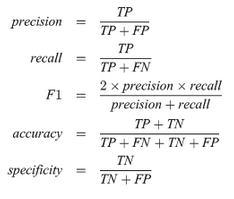

---------------------------

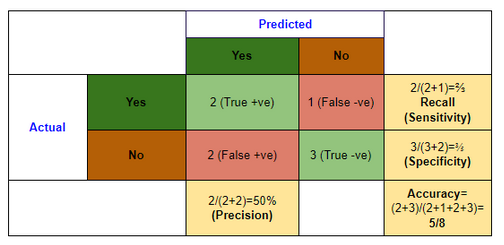

------------------------

**Macro Average (Makro Ortalama)**

* **Ne Zaman Kullanılır:** Dengesiz veri setlerinde, her sınıfın eşit derecede önemli olduğu durumlarda kullanılır.
* **Açıklama:** Her sınıf için hesaplanan metriklerin (örneğin, F1 skoru) basit aritmetik ortalaması alınır. Her sınıf eşit ağırlıkta değerlendirilir, böylece azınlık sınıflarının performansı da dikkate alınır.

**Weighted Average (Ağırlıklı Ortalama)**

* **Ne Zaman Kullanılır:** Her sınıfın veri setindeki temsili oranına göre ağırlıklandırılmasının önemli olduğu durumlarda kullanılır.
* **Açıklama:** Her sınıf için hesaplanan metrikler, o sınıfın veri setindeki oranına göre ağırlıklandırılır. Bu, çoğunluk sınıfının model performansı üzerinde daha büyük etkiye sahip olmasını sağlar.

In [32]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, log_loss

In [33]:
accuracy_score(y_test, y_pred)

0.917

In [34]:
pipe_model.score(X_test, y_test)

0.917

In [35]:
precision_score(y_test, y_pred, pos_label=1)

# 1 dediklerimin gerçete de 1 olma yüzdesi

0.9126365054602185

In [36]:
precision_score(y_test, y_pred, pos_label=0)

# 0 dediklerimin gerçete de 0 olma yüzdesi

0.924791086350975

In [37]:
recall_score(y_test, y_pred, pos_label=1)

# gerçekte 1 olanların yüzde kaçına modelim de 1 demiş

0.9558823529411765

In [38]:
recall_score(y_test, y_pred, pos_label=0)

# gerçekte 0 olanların yüzde kaçına modelim de 0 demiş

0.8556701030927835

In [39]:
f1_score(y_test, y_pred)

# 1 etiketikene göre hesaplanmış olan recall ve precision baz alınarak hesaplanmış f1

0.9337589784517158

In [40]:
f1_score(y_test, y_pred, pos_label=0)

# 0 etiketikene göre hesaplanmış olan recall ve precision baz alınarak hesaplanmış f1

0.8888888888888888

**Log Kaybı (Log Loss):** Modelin tahmin ettiği olasılıkların gerçek olasılıklardan ne kadar uzak olduğunu ölçer. Model gerçek değerin olasılığına yakın bir tahminde bulunursa log kaybı düşük değer alırken gerçek değerin olasılığından uzaklaştıkça artan bir değer verir.

In [41]:
log_loss(y_test, y_pred)

2.991623231296724

--------------------------------------------------------------

In [44]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [45]:
confusion_matrix(y_test, y_pred)

array([[332,  56],
       [ 27, 585]], dtype=int64)

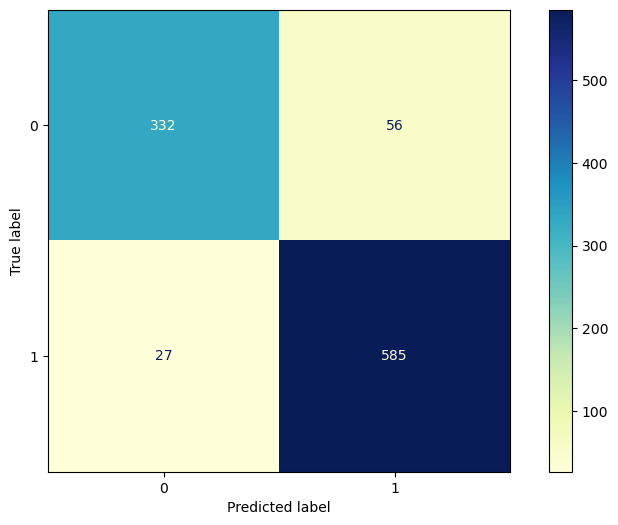

In [46]:
ConfusionMatrixDisplay.from_estimator(pipe_model, X_test, y_test, cmap="YlGnBu")

>**TN:** 332
>
>**FN:** 27
>
>**FP:** 56
>
>**TP:** 585

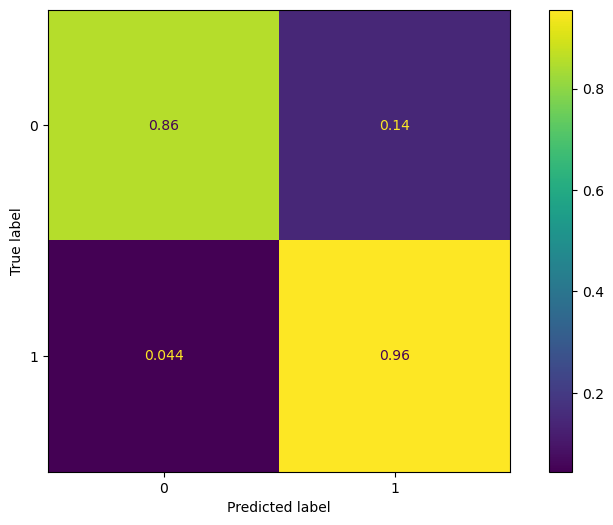

In [47]:
ConfusionMatrixDisplay.from_estimator(pipe_model, X_test, y_test, normalize='true')

# 0 olanların %86 sını bilmişim
# 1 olanların %96 sını bilmişim

# < recall >

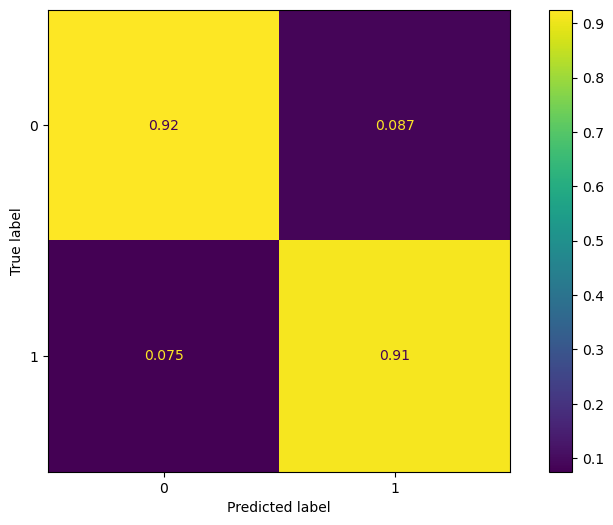

In [48]:
ConfusionMatrixDisplay.from_estimator(pipe_model, X_test, y_test, normalize='pred');

# 0 olarak tahmin ettiklerimin  %92 sını bilmişim
# 1 olarak tahmin ettiklerimin %91 sını bilmişim

# < precision >

In [53]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("-- Test_Set --")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("-- Train_Set --")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [54]:
eval_metric(pipe_model, X_train, y_train, X_test, y_test)

-- Test_Set --
[[332  56]
 [ 27 585]]
              precision    recall  f1-score   support

           0       0.92      0.86      0.89       388
           1       0.91      0.96      0.93       612

    accuracy                           0.92      1000
   macro avg       0.92      0.91      0.91      1000
weighted avg       0.92      0.92      0.92      1000


-- Train_Set --
[[1401  211]
 [ 128 2260]]
              precision    recall  f1-score   support

           0       0.92      0.87      0.89      1612
           1       0.91      0.95      0.93      2388

    accuracy                           0.92      4000
   macro avg       0.92      0.91      0.91      4000
weighted avg       0.92      0.92      0.91      4000



## 3.1. Cross Validation

In [55]:
from sklearn.model_selection import cross_validate

In [56]:
from sklearn.metrics import get_scorer_names

scorers = get_scorer_names()
print(scorers)

['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'balanced_accuracy', 'completeness_score', 'd2_absolute_error_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted', 'matthews_corrcoef', 'max_error', 'mutual_info_score', 'neg_brier_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_gamma_deviance', 'neg_mean_poisson_deviance', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'neg_negative_likelihood_ratio', 'neg_root_mean_squared_error', 'neg_root_mean_squared_log_error', 'normalized_mutual_info_score', 'positive_likelihood_ratio', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'rand_score', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'r

In [57]:
operations = [("scaler", StandardScaler()), ("logistic", LogisticRegression())]

model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, 
                        scoring = ['accuracy', 'precision','recall','f1'], 
                        cv = 10,
                        return_train_score=True,
                        n_jobs=-1)

df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1
1,0.016,0.011,0.920,0.915,0.912,0.914,0.958,0.946,0.934,0.930
2,0.014,0.011,0.930,0.914,0.907,0.915,0.983,0.943,0.944,0.929
3,0.015,0.011,0.948,0.912,0.943,0.911,0.971,0.944,0.957,0.927
4,0.016,0.011,0.938,0.913,0.946,0.912,0.950,0.946,0.948,0.929
5,0.017,0.009,0.900,0.917,0.923,0.917,0.908,0.947,0.916,0.932
6,0.017,0.012,0.905,0.916,0.914,0.915,0.929,0.948,0.921,0.931
7,0.017,0.012,0.902,0.917,0.891,0.918,0.954,0.946,0.921,0.932
8,0.020,0.012,0.900,0.917,0.903,0.915,0.933,0.949,0.918,0.932
9,0.021,0.011,0.902,0.917,0.903,0.916,0.937,0.947,0.920,0.931
10,0.022,0.010,0.907,0.917,0.901,0.916,0.950,0.948,0.925,0.932


In [58]:
df_scores.mean()[2:]

test_accuracy     0.915
train_accuracy    0.916
test_precision    0.914
train_precision   0.915
test_recall       0.947
train_recall      0.947
test_f1           0.930
train_f1          0.930
dtype: float64

> ***CV yapmadan önceki sonuçlar:***
>
> 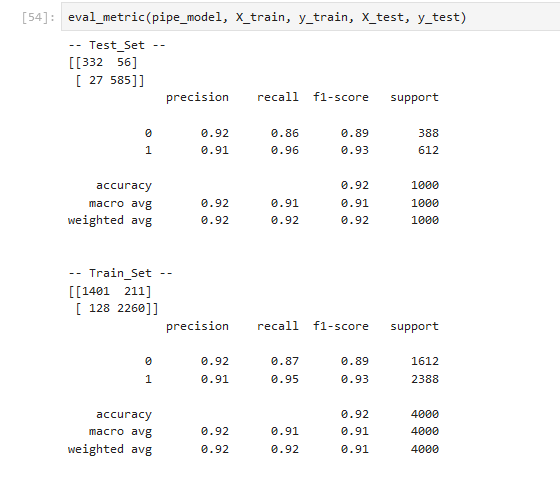

## 3.2. ROC (Receiver Operating Curve) and AUC (Area Under Curve)

> Data Tipi: Balanced Data ise:
>
> > ROC
>  
> Data Tipi: Unbalanced Data ise:
> 
>> Precision-Recall Curve

**Eğer modellerimizde Recall ve Precision değerleri birbirlerine çok yakınsa bu metriklere bakılabilir**

In [59]:
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay, roc_auc_score, auc, roc_curve, average_precision_score

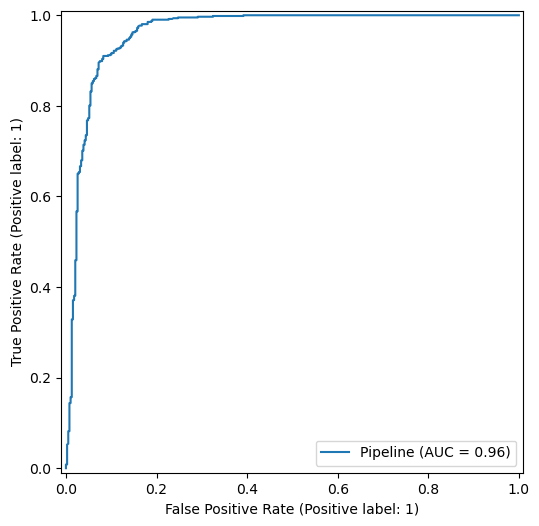

In [60]:
RocCurveDisplay.from_estimator(pipe_model, X_test, y_test);

> Yukarıdaki grafik Modelin ne kadar doğru çalıştığını verir. Önemli metriktir. Dengeli datasetlerinde kullanırız.
> AUC =0.96 modelin 1 labelını 0 labelından ayrıştırmada ortalama %96 oranında başarılı demek.

In [62]:
roc_auc_score(y_test, y_pred_proba[:,1])

0.9625151607034568

In [85]:
PrecisionRecallDisplay.from_estimator(pipe_model, X_test, y_test);

NameError: name 'grid_model' is not defined

In [64]:
average_precision_score(y_test, y_pred_proba[:,1])

0.9595058133245105

# **4. Final Model and Model Deployment**

## 4.1. Without Pipeline

In [65]:
scaler = StandardScaler().fit(X)

In [66]:
import pickle 

In [67]:
pickle.dump(scaler, open("scaler_hearing", "wb"))  

# wb = write binary (binary olarak yaz)
# yukarıdaki işlem ile birlikte scaler_hearing adında yeni bir binary dosya açmış olduk mevcut klasör içerisinde

In [68]:
X_scaled = scaler.transform(X)

In [69]:
final_model = LogisticRegression().fit(X_scaled, y)

In [70]:
pickle.dump(final_model, open("final_model_hearing", "wb"))

# yukarıdaki işlem ile birlikte final_model_hearing adında yeni bir binary dosya açmış olduk mevcut klasör içerisinde

In [71]:
my_dict = {"age": [25, 35, 45, 55, 65],
           "physical_score": [45, 35, 25, 15, 5]}

In [72]:
sample = pd.DataFrame(my_dict)
sample

,age,physical_score
0,25,45
1,35,35
2,45,25
3,55,15
4,65,5


In [73]:
scaler_hearing  = pickle.load(open("scaler_hearing", "rb"))

In [74]:
sample_scaled = scaler_hearing.transform(sample)
sample_scaled

array([[-2.35772643,  1.49831839],
       [-1.47166291,  0.27417606],
       [-0.58559938, -0.94996628],
       [ 0.30046414, -2.17410862],
       [ 1.18652767, -3.39825096]])

In [75]:
final_model = pickle.load(open("final_model_hearing", "rb"))

In [76]:
predictions = final_model.predict(sample_scaled) # final modele predict için scale edilen sample verilir
predictions_proba = final_model.predict_proba(sample_scaled) # samplenin proba değerlerini alırız

In [77]:
predictions

array([1, 1, 0, 0, 0], dtype=int64)

In [78]:
pd.DataFrame(predictions_proba[:,1])

,0
0,1.000
1,0.941
2,0.088
3,0.001
4,0.000


## 4.2. With Pipeline

In [79]:
operations = [("scaler", StandardScaler()), ("logistic", LogisticRegression())]

final_model = Pipeline(steps=operations)

final_model.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic', LogisticRegression())])

In [80]:
pickle.dump(final_model, open("final_pipe_model", "wb"))

In [81]:
new_model = pickle.load(open("final_pipe_model", "rb"))

In [82]:
sample

,age,physical_score
0,25,45
1,35,35
2,45,25
3,55,15
4,65,5


In [83]:
new_model.predict(sample)

array([1, 1, 0, 0, 0], dtype=int64)

In [84]:
sample["pred"] = predictions
sample["pred_proba"] = predictions_proba[:,1]
sample

,age,physical_score,pred,pred_proba
0,25,45,1,1.000
1,35,35,1,0.941
2,45,25,0,0.088
3,55,15,0,0.001
4,65,5,0,0.000
